# Capstone Two: Pre-processing and Training Data Development

# 1.Background

Therapeutic antibodies are very important biopharmaceutics for cancers and autoimmune diseases. However, some antibodies cannot be developed and manufactured due to low stability and high aggregation of antibodies. The capstone project is to build a model predict the developability of antibodies so that the model can guide the pipelines of the development of antibodies and reduce the investment risks.

# 2.Import Modules


In [1]:
import pandas as pd 
import numpy as np


# 3.Load Dataset

In the last project "capstone two data wrangling", the data has been cleaned and separate into theree main columns, including heavy chain, light chain, and label.

In [2]:
featureMat_balanced = pd.read_csv('featureMat_balanced.csv',index_col=False)
featureMat_balanced.drop(columns=["Unnamed: 0"],inplace=True)
featureMat_balanced.reindex(range(2321))
featureMat_balanced.head()


,0,1,2,3,4,5,6,7,8,9,...,2311,2312,2313,2314,2315,2316,2317,2318,2319,developability
0,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Columns 0 to 2319 are VHSE code for amino acid sequences with padding. Developablity is the labels that need to predict.

In [3]:
from sklearn.model_selection import train_test_split

# for repeating resutls, here random state 42 is used
X_train, X_test, y_train, y_test = train_test_split(featureMat_balanced.drop(columns=['developability']), featureMat_balanced.developability, test_size=0.3, random_state=42)
len(X_train)

476

# 4.Modeling

In [4]:
from pycaret.classification import *

## 4.1 A simple test

In [5]:
exp1 = setup(data = featureMat_balanced, target = 'developability', session_id=1, use_gpu = True) 

,Description,Value
0,Session id,1
1,Target,developability
2,Target type,Binary
3,Original data shape,"(680, 2321)"
4,Transformed data shape,"(680, 1369)"
5,Transformed train set shape,"(475, 1369)"
6,Transformed test set shape,"(205, 1369)"
7,Numeric features,2320
8,Preprocess,True
9,Imputation type,simple


In [6]:
best_model1 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7219,0.7884,0.7803,0.6978,0.7353,0.4440,0.4495,1.7450
gbc,Gradient Boosting Classifier,0.7074,0.7570,0.7386,0.6936,0.7143,0.4148,0.4176,3.5640
et,Extra Trees Classifier,0.6843,0.7749,0.7299,0.6700,0.6966,0.3690,0.3734,0.9150
lightgbm,Light Gradient Boosting Machine,0.6842,0.7626,0.6964,0.6778,0.6858,0.3685,0.3702,2.3510
knn,K Neighbors Classifier,0.6717,0.7133,0.7214,0.6620,0.6874,0.3431,0.3475,0.5050
lr,Logistic Regression,0.6675,0.7316,0.6788,0.6651,0.6691,0.3343,0.3374,0.8400
ada,Ada Boost Classifier,0.6613,0.7371,0.6884,0.6509,0.6668,0.3226,0.3266,1.2690
svm,SVM - Linear Kernel,0.6530,0.0000,0.6998,0.6442,0.6637,0.3052,0.3178,0.3540
dt,Decision Tree Classifier,0.6526,0.6572,0.6283,0.6633,0.6436,0.3048,0.3067,0.5760
ridge,Ridge Classifier,0.6256,0.0000,0.6707,0.6167,0.6404,0.2506,0.2540,0.3200


In [7]:
print(best_model1)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1, subsample=1.0, tol=

## 4.2 Test with feature selection

In [8]:
exp2 = setup(data = featureMat_balanced, target = 'developability', feature_selection = True, session_id=1, use_gpu = True) 

,Description,Value
0,Session id,1
1,Target,developability
2,Target type,Binary
3,Original data shape,"(680, 2321)"
4,Transformed data shape,"(680, 11)"
5,Transformed train set shape,"(475, 11)"
6,Transformed test set shape,"(205, 11)"
7,Numeric features,2320
8,Preprocess,True
9,Imputation type,simple


In [9]:
best_model2 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6907,0.7345,0.7350,0.6756,0.7026,0.3818,0.3853,0.9830
gbc,Gradient Boosting Classifier,0.6738,0.7390,0.7136,0.6632,0.6852,0.3481,0.3519,0.8110
ada,Ada Boost Classifier,0.6655,0.7081,0.7094,0.6517,0.6769,0.3313,0.3357,0.8210
et,Extra Trees Classifier,0.6631,0.7468,0.6793,0.6590,0.6674,0.3266,0.3284,0.8840
qda,Quadratic Discriminant Analysis,0.6609,0.6899,0.7757,0.6315,0.6947,0.3222,0.3330,0.6940
lightgbm,Light Gradient Boosting Machine,0.6590,0.7236,0.6835,0.6537,0.6673,0.3180,0.3190,1.7410
knn,K Neighbors Classifier,0.6401,0.6856,0.7422,0.6159,0.6718,0.2799,0.2877,0.8040
dt,Decision Tree Classifier,0.6399,0.6506,0.6413,0.6401,0.6368,0.2802,0.2843,0.8130
ridge,Ridge Classifier,0.6297,0.0000,0.6958,0.6175,0.6515,0.2596,0.2640,0.5330
lda,Linear Discriminant Analysis,0.6297,0.6916,0.6958,0.6175,0.6515,0.2596,0.2640,0.6910


## 4.3 Test with some normalization method and feature selection

In [10]:
exp3 = setup(data = featureMat_balanced, target = 'developability', session_id=1, use_gpu = True,
                  normalize = True,
                  feature_selection = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = True, experiment_name = 'test1')

,Description,Value
0,Session id,1
1,Target,developability
2,Target type,Binary
3,Original data shape,"(680, 2321)"
4,Transformed data shape,"(680, 11)"
5,Transformed train set shape,"(475, 11)"
6,Transformed test set shape,"(205, 11)"
7,Numeric features,2320
8,Preprocess,True
9,Imputation type,simple


Since the encoder of amino acid is based on PCA of amino acids' properties, the normalization or scalling is not required. Here just verify to see the performance.

In [11]:
best_model3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7012,0.7402,0.7473,0.6851,0.7134,0.4022,0.4063,0.9710
rf,Random Forest Classifier,0.6674,0.7296,0.7002,0.6560,0.6766,0.3347,0.3364,1.0190
ada,Ada Boost Classifier,0.6674,0.7172,0.6926,0.6572,0.6729,0.3352,0.3379,1.0150
lightgbm,Light Gradient Boosting Machine,0.6674,0.7194,0.7130,0.6532,0.6802,0.3349,0.3389,2.0190
et,Extra Trees Classifier,0.6503,0.7214,0.6654,0.6445,0.6527,0.2999,0.3017,1.1770
qda,Quadratic Discriminant Analysis,0.6442,0.6944,0.7426,0.6211,0.6743,0.2882,0.2973,0.8640
nb,Naive Bayes,0.6277,0.6823,0.6578,0.6205,0.6340,0.2546,0.2598,0.8250
dt,Decision Tree Classifier,0.6189,0.6315,0.6281,0.6208,0.6212,0.2369,0.2393,0.8020
lr,Logistic Regression,0.6172,0.6608,0.6455,0.6119,0.6249,0.2338,0.2373,7.8370
ridge,Ridge Classifier,0.6152,0.0000,0.6542,0.6072,0.6275,0.2299,0.2330,0.5330


## 4.4 Test with some normalization method

In [12]:
exp4 = setup(data = featureMat_balanced, target = 'developability', session_id=1, use_gpu = True,
                  normalize = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = True, experiment_name = 'test1')

,Description,Value
0,Session id,1
1,Target,developability
2,Target type,Binary
3,Original data shape,"(680, 2321)"
4,Transformed data shape,"(680, 1180)"
5,Transformed train set shape,"(475, 1180)"
6,Transformed test set shape,"(205, 1180)"
7,Numeric features,2320
8,Preprocess,True
9,Imputation type,simple


In [13]:
best_model4 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7199,0.7930,0.7716,0.6984,0.7316,0.4397,0.4448,1.6970
gbc,Gradient Boosting Classifier,0.7053,0.7674,0.7384,0.6909,0.7125,0.4105,0.4136,3.6280
svm,SVM - Linear Kernel,0.6972,0.0000,0.6835,0.7045,0.6919,0.3939,0.3964,0.4430
lightgbm,Light Gradient Boosting Machine,0.6885,0.7617,0.7255,0.6724,0.6966,0.3771,0.3802,2.4120
et,Extra Trees Classifier,0.6842,0.7831,0.7255,0.6698,0.6946,0.3687,0.3727,1.0890
lr,Logistic Regression,0.6761,0.7301,0.6875,0.6740,0.6788,0.3515,0.3536,1.2900
ada,Ada Boost Classifier,0.6634,0.7394,0.6884,0.6542,0.6682,0.3269,0.3312,1.5260
knn,K Neighbors Classifier,0.6569,0.7117,0.7216,0.6439,0.6774,0.3134,0.3190,0.9390
dt,Decision Tree Classifier,0.6547,0.6589,0.6408,0.6612,0.6487,0.3085,0.3106,0.7440
ridge,Ridge Classifier,0.6023,0.0000,0.6491,0.5956,0.6187,0.2039,0.2069,0.4540


# 5 Model Tuning

In section 4, different ways are adopted to train the model. And model traing without normalization method and feature selection give best results, namely model in section 4.1. So the model tuning only considers the top 3 models in section 4.1. The top three models are random forest classifier, gradient boosting classifier, and extra trees classifier.

In [15]:
exp1 = setup(data = featureMat_balanced, target = 'developability', session_id=1, use_gpu = True) 
best_model1 = compare_models(n_select = 3)

rf = create_model('rf', fold = 5)
gbc = create_model('gbc', fold = 5)
et = create_model('et', fold = 5)

,Description,Value
0,Session id,1
1,Target,developability
2,Target type,Binary
3,Original data shape,"(680, 2321)"
4,Transformed data shape,"(680, 1369)"
5,Transformed train set shape,"(475, 1369)"
6,Transformed test set shape,"(205, 1369)"
7,Numeric features,2320
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7219,0.7884,0.7803,0.6978,0.7353,0.4440,0.4495,1.5870
gbc,Gradient Boosting Classifier,0.7074,0.7570,0.7386,0.6936,0.7143,0.4148,0.4176,3.3470
et,Extra Trees Classifier,0.6843,0.7749,0.7299,0.6700,0.6966,0.3690,0.3734,0.8880
lightgbm,Light Gradient Boosting Machine,0.6737,0.7602,0.6964,0.6654,0.6792,0.3476,0.3496,2.0080
knn,K Neighbors Classifier,0.6717,0.7133,0.7214,0.6620,0.6874,0.3431,0.3475,0.5380
lr,Logistic Regression,0.6675,0.7316,0.6788,0.6651,0.6691,0.3343,0.3374,0.8830
ada,Ada Boost Classifier,0.6613,0.7371,0.6884,0.6509,0.6668,0.3226,0.3266,1.0550
svm,SVM - Linear Kernel,0.6530,0.0000,0.6998,0.6442,0.6637,0.3052,0.3178,0.3610
dt,Decision Tree Classifier,0.6526,0.6572,0.6283,0.6633,0.6436,0.3048,0.3067,0.5570
ridge,Ridge Classifier,0.6256,0.0000,0.6707,0.6167,0.6404,0.2506,0.2540,0.3190


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.8344,0.7917,0.7170,0.7525,0.4730,0.4757
1,0.6421,0.7021,0.7500,0.6207,0.6792,0.2825,0.2890
2,0.7579,0.8016,0.7447,0.7609,0.7527,0.5156,0.5157
3,0.6842,0.7580,0.7021,0.6735,0.6875,0.3686,0.3690
4,0.6842,0.7617,0.6809,0.6809,0.6809,0.3684,0.3684
Mean,0.7011,0.7716,0.7339,0.6906,0.7106,0.4016,0.4036
Std,0.0414,0.0446,0.0388,0.0467,0.0344,0.0830,0.0817


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.7903,0.7708,0.7255,0.7475,0.4733,0.4742
1,0.6211,0.6913,0.6667,0.6154,0.6400,0.2413,0.2422
2,0.6947,0.7668,0.7447,0.6731,0.7071,0.3901,0.3923
3,0.7053,0.7668,0.7234,0.6939,0.7083,0.4107,0.4111
4,0.6947,0.7970,0.7447,0.6731,0.7071,0.3901,0.3923
Mean,0.6905,0.7625,0.7301,0.6762,0.7020,0.3811,0.3824
Std,0.0380,0.0376,0.0351,0.0359,0.0347,0.0762,0.0763


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.8302,0.8125,0.7091,0.7573,0.4728,0.4780
1,0.6211,0.7225,0.7292,0.6034,0.6604,0.2403,0.2459
2,0.7263,0.7930,0.7021,0.7333,0.7174,0.4523,0.4527
3,0.7158,0.7644,0.7660,0.6923,0.7273,0.4321,0.4346
4,0.6316,0.7117,0.6170,0.6304,0.6237,0.2629,0.2630
Mean,0.6863,0.7644,0.7254,0.6737,0.6972,0.3721,0.3748
Std,0.0496,0.0440,0.0656,0.0489,0.0483,0.0995,0.0994


In [16]:
tuned_rf = tune_model(rf)
tuned_gbc = tune_model(gbc)
tuned_et = tune_model(et)
print(tuned_rf)
print(tuned_gbc)
print(tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7882,0.8750,0.6364,0.7368,0.3750,0.4045
1,0.7708,0.8663,0.9167,0.7097,0.8000,0.5417,0.5663
2,0.6667,0.7309,0.7500,0.6429,0.6923,0.3333,0.3381
3,0.6667,0.7847,0.8333,0.6250,0.7143,0.3333,0.3536
4,0.6875,0.7604,0.7917,0.6552,0.7170,0.3750,0.3834
5,0.7021,0.8315,0.7500,0.6923,0.7200,0.4029,0.4044
6,0.6383,0.6848,0.7500,0.6207,0.6792,0.2730,0.2794
7,0.6809,0.6975,0.6522,0.6818,0.6667,0.3608,0.3612
8,0.7234,0.7736,0.8261,0.6786,0.7451,0.4491,0.4595


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7292,0.8090,0.7500,0.7200,0.7347,0.4583,0.4587
1,0.7917,0.8490,0.8333,0.7692,0.8000,0.5833,0.5854
2,0.6042,0.6944,0.6250,0.6000,0.6122,0.2083,0.2085
3,0.6667,0.7656,0.7500,0.6429,0.6923,0.3333,0.3381
4,0.7083,0.7535,0.7083,0.7083,0.7083,0.4167,0.4167
5,0.7660,0.8261,0.7917,0.7600,0.7755,0.5313,0.5318
6,0.6809,0.7156,0.6667,0.6957,0.6809,0.3620,0.3623
7,0.6383,0.7591,0.5652,0.6500,0.6047,0.2743,0.2766
8,0.7021,0.8188,0.6087,0.7368,0.6667,0.4018,0.4078


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7083,0.7986,0.8750,0.6562,0.7500,0.4167,0.4419
1,0.7292,0.8090,0.8750,0.6774,0.7636,0.4583,0.4792
2,0.6667,0.6927,0.8333,0.6250,0.7143,0.3333,0.3536
3,0.7708,0.7135,0.8750,0.7241,0.7925,0.5417,0.5538
4,0.7083,0.7830,0.7917,0.6786,0.7308,0.4167,0.4226
5,0.7234,0.7917,0.7917,0.7037,0.7451,0.4450,0.4487
6,0.6383,0.6993,0.6667,0.6400,0.6531,0.2756,0.2759
7,0.6809,0.7264,0.6957,0.6667,0.6809,0.3620,0.3623
8,0.6596,0.7717,0.6957,0.6400,0.6667,0.3201,0.3212


Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
 

## 6 Ensemble a Model
## 6.1 Bagging

In [18]:
bagged_rf = ensemble_model(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7292,0.8030,0.9167,0.6667,0.7719,0.4583,0.4944
1,0.6875,0.8368,0.7083,0.6800,0.6939,0.3750,0.3753
2,0.6042,0.7274,0.6667,0.5926,0.6275,0.2083,0.2100
3,0.6875,0.7448,0.7917,0.6552,0.7170,0.3750,0.3834
4,0.6875,0.7622,0.7500,0.6667,0.7059,0.3750,0.3780
5,0.7872,0.8116,0.8333,0.7692,0.8000,0.5735,0.5756
6,0.6596,0.7156,0.6667,0.6667,0.6667,0.3188,0.3188
7,0.6596,0.7554,0.6087,0.6667,0.6364,0.3176,0.3188
8,0.6596,0.7736,0.6957,0.6400,0.6667,0.3201,0.3212


In [20]:
bagged_gbc = ensemble_model(tuned_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7292,0.7969,0.7917,0.7037,0.7451,0.4583,0.4620
1,0.7708,0.8698,0.7917,0.7600,0.7755,0.5417,0.5421
2,0.6667,0.7014,0.7083,0.6538,0.6800,0.3333,0.3345
3,0.7083,0.7847,0.7917,0.6786,0.7308,0.4167,0.4226
4,0.7083,0.7500,0.7917,0.6786,0.7308,0.4167,0.4226
5,0.7447,0.7790,0.7500,0.7500,0.7500,0.4891,0.4891
6,0.6809,0.7319,0.6667,0.6957,0.6809,0.3620,0.3623
7,0.6809,0.7446,0.6522,0.6818,0.6667,0.3608,0.3612
8,0.6596,0.7935,0.6957,0.6400,0.6667,0.3201,0.3212


In [21]:
bagged_et = ensemble_model(tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8038,0.8750,0.6176,0.7241,0.3333,0.3667
1,0.7292,0.8507,0.8333,0.6897,0.7547,0.4583,0.4686
2,0.6458,0.7049,0.7917,0.6129,0.6909,0.2917,0.3049
3,0.6875,0.7674,0.8333,0.6452,0.7273,0.3750,0.3920
4,0.6875,0.7535,0.7917,0.6552,0.7170,0.3750,0.3834
5,0.7660,0.8080,0.8333,0.7407,0.7843,0.5304,0.5348
6,0.6596,0.7518,0.7083,0.6538,0.6800,0.3176,0.3188
7,0.7021,0.7138,0.7391,0.6800,0.7083,0.4051,0.4065
8,0.6383,0.7337,0.6957,0.6154,0.6531,0.2782,0.2805


## 6.2 Boosting

In [22]:
boosted_rf = ensemble_model(tuned_rf, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8212,0.8750,0.6364,0.7368,0.3750,0.4045
1,0.7292,0.8316,0.7917,0.7037,0.7451,0.4583,0.4620
2,0.6042,0.7188,0.7083,0.5862,0.6415,0.2083,0.2130
3,0.7292,0.7500,0.8333,0.6897,0.7547,0.4583,0.4686
4,0.6875,0.7726,0.7500,0.6667,0.7059,0.3750,0.3780
5,0.7660,0.8152,0.7917,0.7600,0.7755,0.5313,0.5318
6,0.6383,0.7047,0.6667,0.6400,0.6531,0.2756,0.2759
7,0.6596,0.7500,0.6087,0.6667,0.6364,0.3176,0.3188
8,0.7021,0.8170,0.7391,0.6800,0.7083,0.4051,0.4065


In [23]:
boosted_gbc = ensemble_model(tuned_gbc, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7986,0.7917,0.6552,0.7170,0.3750,0.3834
1,0.7708,0.8663,0.7917,0.7600,0.7755,0.5417,0.5421
2,0.6458,0.7031,0.7083,0.6296,0.6667,0.2917,0.2940
3,0.6875,0.7639,0.7917,0.6552,0.7170,0.3750,0.3834
4,0.7083,0.7552,0.7917,0.6786,0.7308,0.4167,0.4226
5,0.7447,0.8043,0.7500,0.7500,0.7500,0.4891,0.4891
6,0.6383,0.7355,0.6667,0.6400,0.6531,0.2756,0.2759
7,0.6596,0.7355,0.6087,0.6667,0.6364,0.3176,0.3188
8,0.7447,0.8279,0.7826,0.7200,0.7500,0.4901,0.4918


In [24]:
boosted_et = ensemble_model(tuned_et, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8073,0.9167,0.6286,0.7458,0.3750,0.4219
1,0.7500,0.8455,0.8750,0.7000,0.7778,0.5000,0.5164
2,0.6458,0.7274,0.7917,0.6129,0.6909,0.2917,0.3049
3,0.7083,0.7552,0.8333,0.6667,0.7407,0.4167,0.4303
4,0.6875,0.7691,0.7917,0.6552,0.7170,0.3750,0.3834
5,0.7447,0.8134,0.8333,0.7143,0.7692,0.4873,0.4945
6,0.6383,0.7210,0.6667,0.6400,0.6531,0.2756,0.2759
7,0.7021,0.7373,0.6957,0.6957,0.6957,0.4040,0.4040
8,0.6809,0.8062,0.7826,0.6429,0.7059,0.3643,0.3728


## 6.3 Blending

In [25]:
blend_soft = blend_models(estimator_list = [tuned_rf, tuned_gbc, tuned_et], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8351,0.8333,0.6452,0.7273,0.3750,0.3920
1,0.7917,0.8264,0.8750,0.7500,0.8077,0.5833,0.5916
2,0.6458,0.7292,0.7083,0.6296,0.6667,0.2917,0.2940
3,0.7292,0.7587,0.8333,0.6897,0.7547,0.4583,0.4686
4,0.7292,0.7795,0.7917,0.7037,0.7451,0.4583,0.4620
5,0.7660,0.8098,0.7917,0.7600,0.7755,0.5313,0.5318
6,0.6383,0.7029,0.6667,0.6400,0.6531,0.2756,0.2759
7,0.6809,0.7391,0.6522,0.6818,0.6667,0.3608,0.3612
8,0.6809,0.8080,0.7826,0.6429,0.7059,0.3643,0.3728


In [26]:
blend_hard = blend_models(estimator_list = [tuned_rf, tuned_gbc, tuned_et], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7083,0.0000,0.7917,0.6786,0.7308,0.4167,0.4226
1,0.7708,0.0000,0.8333,0.7407,0.7843,0.5417,0.5459
2,0.6667,0.0000,0.7500,0.6429,0.6923,0.3333,0.3381
3,0.7500,0.0000,0.8333,0.7143,0.7692,0.5000,0.5071
4,0.7083,0.0000,0.7917,0.6786,0.7308,0.4167,0.4226
5,0.7660,0.0000,0.7917,0.7600,0.7755,0.5313,0.5318
6,0.6383,0.0000,0.6667,0.6400,0.6531,0.2756,0.2759
7,0.6596,0.0000,0.6087,0.6667,0.6364,0.3176,0.3188
8,0.7021,0.0000,0.7826,0.6667,0.7200,0.4061,0.4121


## 6.4 Stacking

In [29]:
stack_soft = stack_models([tuned_rf, tuned_gbc, tuned_et])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6458,0.7170,0.7500,0.6207,0.6792,0.2917,0.2982
1,0.7708,0.8524,0.8750,0.7241,0.7925,0.5417,0.5538
2,0.5625,0.5955,0.5417,0.5652,0.5532,0.1250,0.1251
3,0.6875,0.6944,0.6667,0.6957,0.6809,0.3750,0.3753
4,0.6042,0.6823,0.5833,0.6087,0.5957,0.2083,0.2085
5,0.5957,0.6993,0.7083,0.5862,0.6415,0.1874,0.1919
6,0.7234,0.7899,0.7083,0.7391,0.7234,0.4471,0.4475
7,0.6383,0.7210,0.5217,0.6667,0.5854,0.2730,0.2794
8,0.7021,0.7355,0.6522,0.7143,0.6818,0.4029,0.4044


# 7 Model Calibration

Based on model tuning and ensemble method, blend_soft model gives the highest accuracy. So the model would like to be calibrated to determine final model.

In [30]:
calibrated_blend_soft = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8194,0.7917,0.6552,0.7170,0.3750,0.3834
1,0.7292,0.8576,0.7500,0.7200,0.7347,0.4583,0.4587
2,0.6458,0.7326,0.7083,0.6296,0.6667,0.2917,0.2940
3,0.6875,0.7552,0.7500,0.6667,0.7059,0.3750,0.3780
4,0.6875,0.7708,0.7500,0.6667,0.7059,0.3750,0.3780
5,0.7447,0.8207,0.7917,0.7308,0.7600,0.4882,0.4900
6,0.6596,0.7373,0.6667,0.6667,0.6667,0.3188,0.3188
7,0.6596,0.7554,0.6087,0.6667,0.6364,0.3176,0.3188
8,0.7021,0.8243,0.7391,0.6800,0.7083,0.4051,0.4065


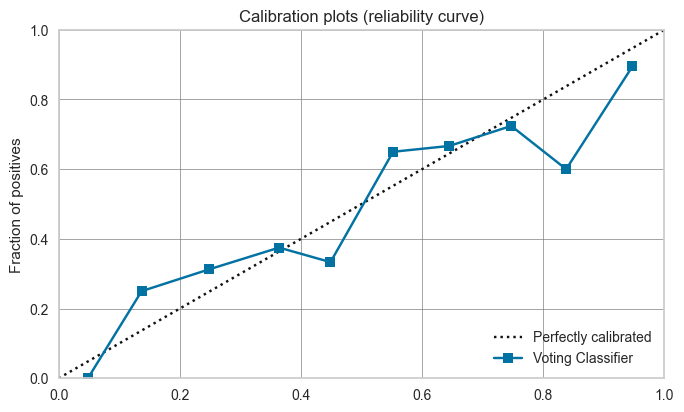

In [34]:
plot_model(calibrated_blend_soft, plot='calibration')

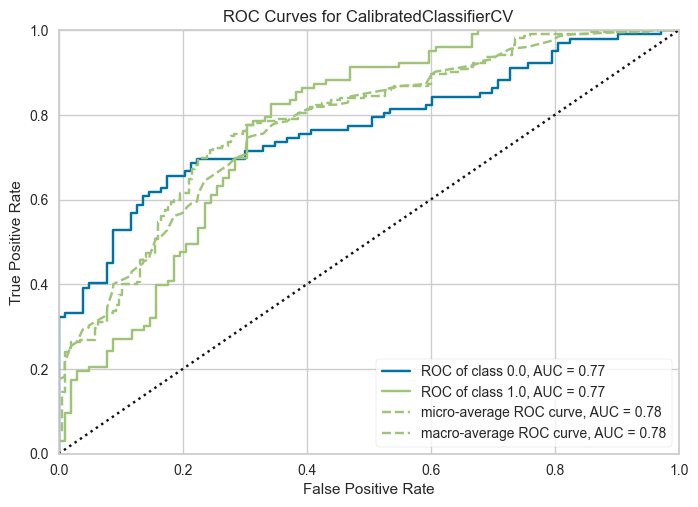

In [40]:
plot_model(calibrated_blend_soft, plot = 'auc')

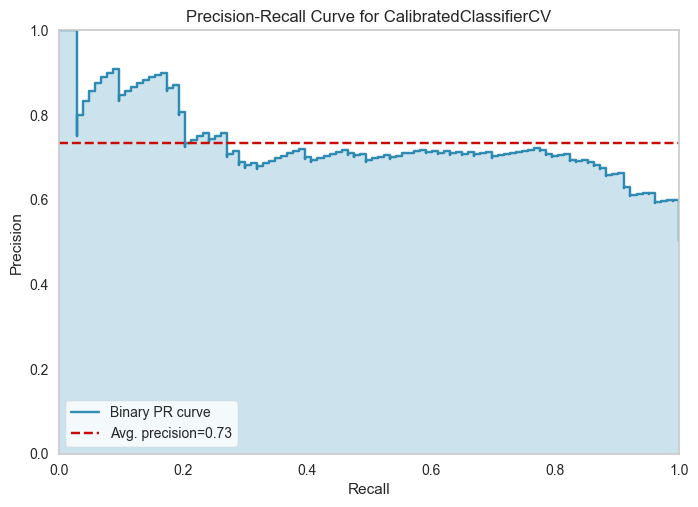

In [41]:
plot_model(calibrated_blend_soft, plot = 'pr')

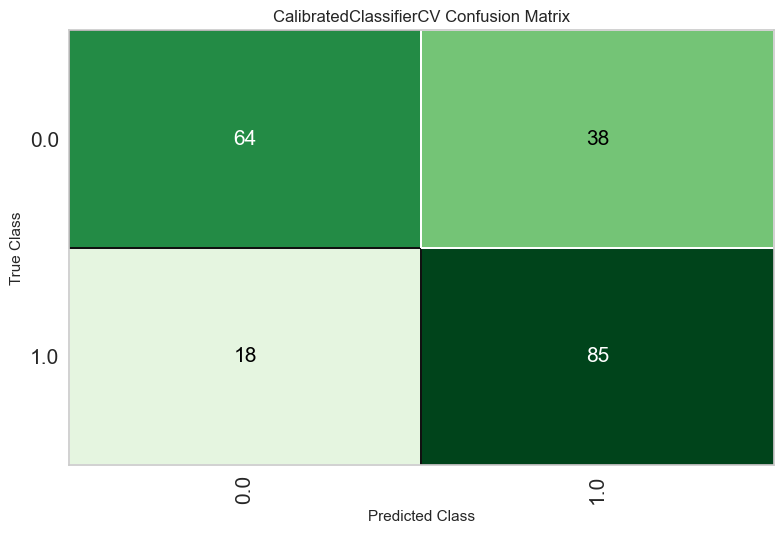

In [43]:
plot_model(calibrated_blend_soft, plot='confusion_matrix')

In [45]:
predict_model(calibrated_blend_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7268,0.7718,0.8252,0.6911,0.7522,0.4531,0.4620


,0,1,2,3,4,5,6,7,8,9,...,1361,1362,1363,1364,1365,1366,1367,developability,prediction_label,prediction_score
475,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.8604
476,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.6108
477,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.5821
478,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.8031
479,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.6972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.6523
676,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.7387
677,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.5507
678,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.5387


Since the accuracy of test set is slightly better than the calibrated model, the model is not overfitted.

# 8 Finalize Model for Deployment

All data are fed into the calibrated model.

In [36]:
final_calibrated_blend_soft = finalize_model(calibrated_blend_soft)

In [37]:
print(final_calibrated_blend_soft)

Pipeline(memory=Memory(location=C:\Users\yinzh\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_v...
                                                                                                          max_leaf_nodes=None,
                                                                                 

In [38]:
predict_model(final_calibrated_blend_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9512,0.9985,1.0000,0.9115,0.9537,0.9024,0.9067


,0,1,2,3,4,5,6,7,8,9,...,1361,1362,1363,1364,1365,1366,1367,developability,prediction_label,prediction_score
475,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.8956
476,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.7073
477,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.6624
478,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.8752
479,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.5105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.6140
676,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.5209
677,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.6725
678,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.7230


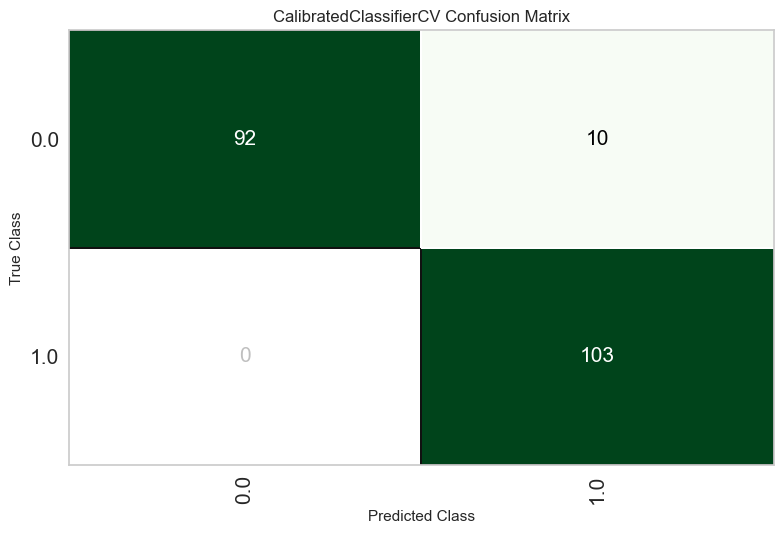

In [46]:
plot_model(final_calibrated_blend_soft, plot='confusion_matrix')

It obtained very good accuracy when all data is used to train.

# 9 Saving the model

In [39]:
save_model(final_calibrated_blend_soft,'Final blend soft model 15 Oct 2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\yinzh\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_v...
                                                                                                           max_leaf_nodes=None,
                                                                     